In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from scipy import stats
import math
import pandas as pd
import seaborn as sns

Aproximar la función:

Y=cos(1.5πX)  - - - - - - - - - - - - - - - -  ecuación1 

utilizando una regresión lineal y con solo 30 observaciones de esta función

Pregunta 1: ¿Cuales son las principales complicaciones de este planteamiento

Respuesta: La primera complicacion es porque la ecuacion es lo suficientemente compleja que el modelo de regresion lineal no se ajusta a la observacion de los datos, la segunda complicacion es porque solo existen 30 datos.

In [ ]:
Creamos los arreglos para la funcion 

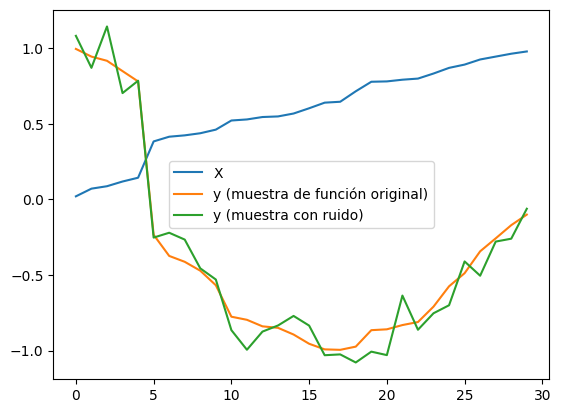

In [2]:
np.random.seed(0)
n_samples = 30

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

X = np.sort(np.random.rand(n_samples))
y_sin_ruido = true_fun(X)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.plot(X, label='X')
plt.plot(y_sin_ruido, label='y (muestra de función original)')
plt.plot(y, label='y (muestra con ruido)')
plt.legend();

Visualizamos los arreglos

In [7]:
X

array([0.0202184 , 0.07103606, 0.0871293 , 0.11827443, 0.14335329,
       0.38344152, 0.41466194, 0.4236548 , 0.43758721, 0.46147936,
       0.52184832, 0.52889492, 0.54488318, 0.5488135 , 0.56804456,
       0.60276338, 0.63992102, 0.64589411, 0.71518937, 0.77815675,
       0.78052918, 0.79172504, 0.79915856, 0.83261985, 0.87001215,
       0.891773  , 0.92559664, 0.94466892, 0.96366276, 0.97861834])

In [8]:
y_sin_ruido

array([ 0.99546458,  0.94449262,  0.91688662,  0.84865708,  0.78037161,
       -0.23394106, -0.37393855, -0.41289455, -0.47175914, -0.56783552,
       -0.77603592, -0.7965471 , -0.83979482, -0.84970544, -0.89393556,
       -0.95499982, -0.99206799, -0.99521276, -0.9739715 , -0.86513109,
       -0.85946996, -0.83131676, -0.8113413 , -0.70948024, -0.57495841,
       -0.48818398, -0.34347788, -0.25779714, -0.17039962, -0.10058829])

In [9]:
y

array([ 1.0819082 ,  0.87027612,  1.14386208,  0.70322051,  0.78494746,
       -0.25265944, -0.22066063, -0.26595867, -0.4562644 , -0.53001927,
       -0.86481449, -0.99462675, -0.87458603, -0.83407054, -0.77090649,
       -0.83476183, -1.03080067, -1.02544303, -1.0788268 , -1.00713288,
       -1.03009698, -0.63623922, -0.86230652, -0.75328767, -0.70023795,
       -0.41043495, -0.50486767, -0.27907117, -0.25994628, -0.06189804])

Pregunta 2: ¿Cuántos grados son necesarios? 
Respuesta = Depende, necesitamos un modelo que se ajuste, donde el Bias y la Varianza se equilibren.Para ello es necesario testear para identificar el grado adecuado. Se hace un testeo con 1, 4 y 15 grados

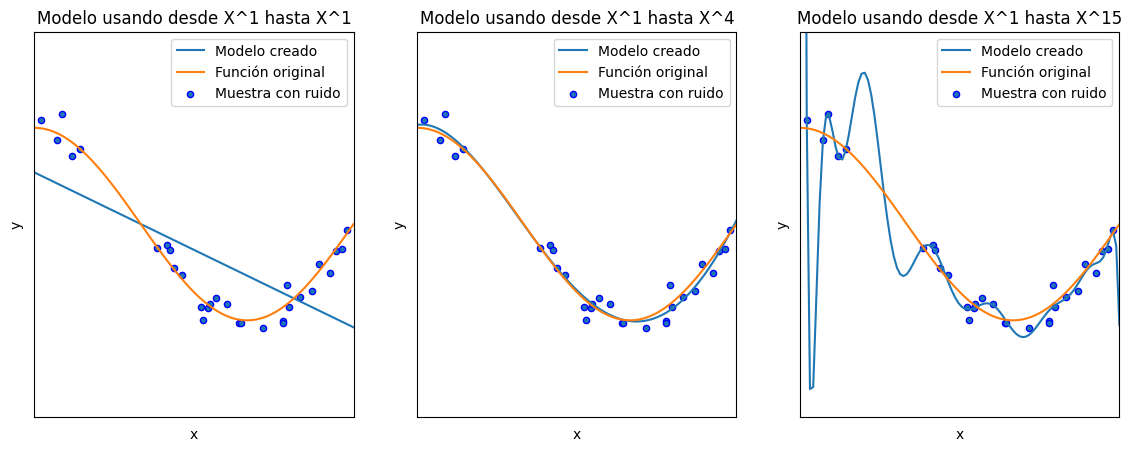

In [3]:
degrees = [1, 4, 15]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression),])
    pipeline.fit(X[:, np.newaxis], y)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Modelo creado")
    plt.plot(X_test, true_fun(X_test), label="Función original")
    plt.scatter(X, y, edgecolor="b", s=20, label="Muestra con ruido")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Modelo usando desde X^1 hasta X^{}".format(degrees[i]))
plt.show()

Visualizamos que:
1) con 1 grado se obtiene un UNDERFITTING, debido a que no se ajusta a los datos observados.
2) con 15 grados se obtiene un OVERFITTING, debido a que se ajusta demasiado bien a los datos observados, sin embargo será deficiente con nuevos datos.
3) con 4 grados se ajusta bien a los datos observados, por lo que podrá realizar buenas predicciones. 